# 第5章 多元线性回归

## 5.1 二元线性回归

模型:Cobb-Douglas生产函数

$\ln y_i=\ln \alpha +\beta\ln k_i +\gamma \ln l_i + \epsilon_i$

In [60]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

CD = pd.read_stata('../2_Data/Data-2e/cobb_douglas.dta')
CD.head()

,year,k,l,y,lnk,lnl,lny
0,1899,100,100,100,4.605170,4.605170,4.605170
1,1900,107,105,101,4.672829,4.653960,4.615120
2,1901,114,110,112,4.736198,4.700480,4.718499
3,1902,122,118,122,4.804021,4.770685,4.804021
4,1903,131,123,124,4.875197,4.812184,4.820282


In [61]:
# 定义变量

X = CD[['lnk','lnl']]
y = CD['lny']
X = sm.add_constant(X)

# 建立回归模型
model = sm.OLS(y,X)
results = model.fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lny   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     236.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           4.04e-15
Time:                        00:45:13   Log-Likelihood:                 35.826
No. Observations:                  24   AIC:                            -65.65
Df Residuals:                      21   BIC:                            -62.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1773      0.434     -0.408      0.687      -1.080       0.726
lnk            0.2331      0.064      3.668      0.001       0.101       0.365
lnl            0.8073      0.145      5.565      0.000       0.506       1.109
==============================================================================
Omnibus:                        2.133   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.361
Skew:                           0.583   Prob(JB):                        0.506
Kurtosis:                       2.992   Cond. No.                         285.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# sm.graphics.plot_partregress(endog='lny', 
#                              exog_i='lnk',
#                              exog_others=['lnl'],
#                              data=CD, 
#                              obs_labels=False # 不显示样本点的标签
#                              )

## 5.4 OLS的几何解释

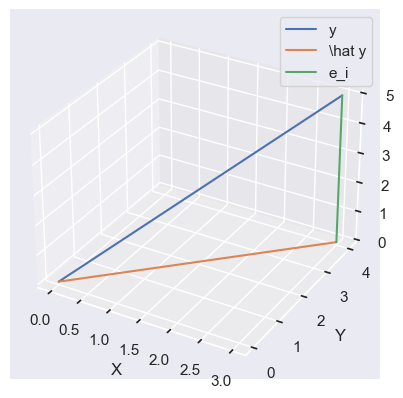

In [63]:
#借助kimi实现的代码

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义点a和点b的坐标
a = np.array([0, 0, 0])
b = np.array([3, 4, 5])

# 创建3D图形和坐标轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制直线y
ax.plot3D([a[0], b[0]], [a[1], b[1]], [a[2], b[2]], label='y')

# 计算直线在xy平面上的投影点
# 投影点的z坐标为0
projected_point = (b[0], b[1], 0)

# 绘制投影线$\hat y$
ax.plot3D([a[0], projected_point[0]], [a[1], projected_point[1]], [a[2], projected_point[2]], label='\hat y')

# 计算点b到投影点的垂线e
# 由于我们已经在xy平面上，垂线e的x和y坐标与投影点相同，z坐标与点b相同
e_point = (projected_point[0], projected_point[1], b[2])

# 绘制垂线e
ax.plot3D([projected_point[0], e_point[0]], [projected_point[1], e_point[1]], [projected_point[2], e_point[2]], label='e_i')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 显示图例
ax.legend()

# 显示图形
plt.show()

## 5.12 多元线性回归的python命令及实例

数据：grilic.dta
对以下方程进行多元线性回归：$$\ln{w}=\beta_1+\beta_2s+\beta_3expr+\beta_4tenure+\beta_5smsa+\beta_6rns+\epsilon$$

### 模型回归

In [64]:
import pandas as pd
import statsmodels.api as sm

grilic = pd.read_stata('../2_Data/Data-2e/grilic.dta')
grilic.head()

,rns,mrt,smsa,med,iq,kww,age,s,expr,tenure,lnw
0,0,0,1,8,93,35,19,12,0.462,0,5.900
1,0,0,1,14,119,41,23,16,0.000,2,5.438
2,0,0,1,14,108,46,20,14,0.423,1,5.710
3,0,0,1,12,96,32,18,12,0.333,1,5.481
4,0,1,1,6,74,27,26,9,9.013,3,5.927


In [65]:
X=grilic[['s','expr','tenure','smsa','rns']]
y = grilic['lnw']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     81.75
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.52e-68
Time:                        00:45:14   Log-Likelihood:                -268.96
No. Observations:                 758   AIC:                             549.9
Df Residuals:                     752   BIC:                             577.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1037      0.085     48.223      0.0

### 回归结果的使用
常用的属性与方法

|方法|描述|
|----|----|
|summary()|输出回归结果的摘要信息|
|cov_params()|输出回归系数的协方差矩阵|
|conf_int()|输出回归系数的置信区间| 
|f_test()|输出F检验的结果|
|predict(x)|输出回归预测值|

还有部分可直接调用的属性
|属性|描述|
|----|----|
|params|回归系数|
|bse|回归系数的标准误差|
|tvalues|回归系数的t值|
|pvalues|回归系数的p值|
|fittedvalues|回归拟合值|
|nobs|样本量|
|ssr|残差平方和|
|ess|解释变量的平方和|
|rsquared|R方|
|rsquared_adj|调整后R方|

等等，参阅[官方文档-statsmodels.regression.linear_model.RegressionResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html)


In [66]:
# 查看回归系数的协方差矩阵\置信区间
print(results.cov_params())
print(results.conf_int())

           const             s          expr        tenure      smsa  \
const   0.007242 -4.656708e-04 -1.677820e-04 -8.646432e-05 -0.000387   
s      -0.000466  3.420855e-05  8.660311e-06 -3.997250e-08 -0.000014   
expr   -0.000168  8.660311e-06  4.002835e-05 -1.106982e-05  0.000003   
tenure -0.000086 -3.997250e-08 -1.106982e-05  5.994430e-05 -0.000008   
smsa   -0.000387 -1.440121e-05  3.260602e-06 -7.819468e-06  0.000789   
rns    -0.000440  8.523976e-06  7.334432e-07  7.259141e-06  0.000125   

                 rns  
const  -4.399747e-04  
s       8.523976e-06  
expr    7.334432e-07  
tenure  7.259141e-06  
smsa    1.248584e-04  
rns     8.292835e-04  
               0         1
const   3.936619  4.270731
s       0.091161  0.114125
expr    0.025699  0.050539
tenure  0.020415  0.050814
smsa    0.084538  0.194795
rns    -0.140612 -0.027547


In [67]:
# 返回p、t值、ssr、ess、残差等
print(results.pvalues)
print(results.tvalues)
print(results.ssr)
print(results.ess)
print(results.resid)


const     2.627210e-232
s          4.747456e-58
expr       2.646372e-09
tenure     4.957792e-06
smsa       8.152446e-07
rns        3.608279e-03
dtype: float64
const     48.223494
s         17.549396
expr       6.024993
tenure     4.599955
smsa       4.973503
rns       -2.919711
dtype: float64
90.23826842236467
49.04788110650652
0      0.407331
1     -0.518859
2     -0.022083
3     -0.042366
4      0.309462
         ...   
753    0.185835
754   -0.137304
755    0.348650
756    0.210581
757   -0.362152
Length: 758, dtype: float64


In [68]:
# 模型预测值和预测
print(results.fittedvalues)
print(results.predict(X))

# 上述两种方法得出的结果一致
# 但第一种方法更加直观，更容易理解。
# 第二种方法提供了一种更加通用的方法，可以接受新的观察值，并得到相应的预测值

0      5.492669
1      5.956859
2      5.732083
3      5.523366
4      5.617538
         ...   
753    5.837165
754    5.313305
755    5.435350
756    5.417419
757    5.437152
Length: 758, dtype: float64
0      5.492669
1      5.956859
2      5.732083
3      5.523366
4      5.617538
         ...   
753    5.837165
754    5.313305
755    5.435350
756    5.417419
757    5.437152
Length: 758, dtype: float64


In [69]:
# t检验
# 对原假设H0：$\beta_2=0.1$ ,即s的回归系数s值为0.1，进行t检验，以0.05的显著性水平进行建议
# 字符串形式参数
r_matrix = 's = 0.1'
T_test = results.t_test(r_matrix)
T_test


<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1026      0.006      0.452      0.651       0.091       0.114

In [70]:
import numpy as np

# 元组形式参数
R = np.zeros_like(results.params)
R[1] = 1 
# R=[0, 1, 0, 0, 0, 0] -> b=[const, s, expr, tenure, smsa, rns]的回归系数
# 这个矩阵算出来等于q
q = 0.1
r_matrix = (R,q)

T_test = results.t_test(r_matrix)
T_test

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1026      0.006      0.452      0.651       0.091       0.114

### 进行无常数项的回归

In [71]:
# 进行无常数项的回归
X_noconst=grilic[['s','expr','tenure','smsa','rns']]
y = grilic['lnw']

model = sm.OLS(y,X_noconst)
results = model.fit()
print(results.summary()) #

                                 OLS Regression Results                                
Dep. Variable:                    lnw   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              9903.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                        0.00
Time:                        00:45:14   Log-Likelihood:                         -803.02
No. Observations:                 758   AIC:                                      1616.
Df Residuals:                     753   BIC:                                      1639.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [72]:
# 只对南方居民的子样本进行回归，可使用虚拟变量rns,即：grilic['rns'] == 1
grilic_south = grilic[grilic['rns'] == 1]

X=grilic_south[['s','expr','tenure','smsa','rns']]
y = grilic_south['lnw']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     36.07
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.17e-22
Time:                        00:45:14   Log-Likelihood:                -72.353
No. Observations:                 204   AIC:                             154.7
Df Residuals:                     199   BIC:                             171.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
s              0.1198      0.011     10.589      0.0

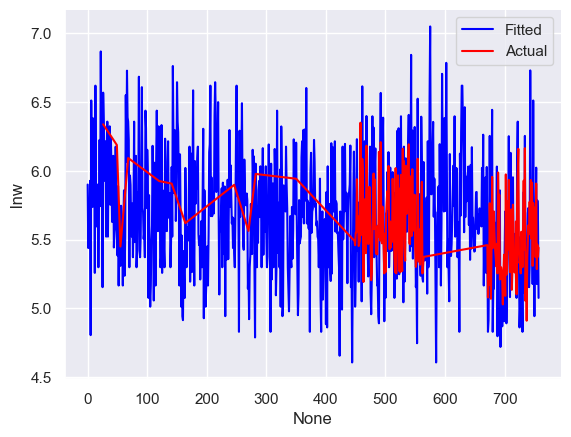

In [73]:
# 计算被解释变量的拟合值
df = pd.DataFrame(grilic['lnw'])
df['lnw1']=results.predict(X)

# 画两条曲线，展示拟合值与实际值的关系图
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(x=df.index, y='lnw', data=df, color='blue',label='Fitted')
sns.lineplot(x=df.index, y='lnw1', data=df, color='red',label='Actual')
sns.despine()



### 观测值子集的回归

In [74]:
# 只对北方居民的子样本进行回归，可使用虚拟变量rns,即：grilic['rns'] == 0
grilic_north = grilic[grilic['rns'] == 0]

X=grilic_north[['s','expr','tenure','smsa','rns']]
y = grilic_north['lnw']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     62.45
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.70e-43
Time:                        00:45:14   Log-Likelihood:                -191.70
No. Observations:                 554   AIC:                             393.4
Df Residuals:                     549   BIC:                             415.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2140      0.100     42.318      0.0

e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [75]:
# 只对中学以上（s>=12）的子样本进行回归，
grilic_mds = grilic[grilic['s'] >= 12]

X=grilic_mds[['s','expr','tenure','smsa','rns']]
y = grilic_mds['lnw']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     69.81
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           8.21e-59
Time:                        00:45:14   Log-Likelihood:                -240.54
No. Observations:                 679   AIC:                             493.1
Df Residuals:                     673   BIC:                             520.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0153      0.098     40.906      0.0

In [76]:
# 只对中学以上（s>=12）的南方居民子样本进行回归，
grilic_mds_south = grilic[(grilic['s'] >= 12) & (grilic['rns'] == 1)]
# grilic_mds_south = grilic[(grilic['s'] >= 12) and (grilic['rns'] == 1)]

X=grilic_mds_south[['s','expr','tenure','smsa','rns']]
y = grilic_mds_south['lnw']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     32.17
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           6.29e-20
Time:                        00:45:14   Log-Likelihood:                -59.681
No. Observations:                 174   AIC:                             129.4
Df Residuals:                     169   BIC:                             145.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
s              0.1269      0.013      9.626      0.0

## 习题

### 5.5

(1) 
(2) 接受
(3) 接受
(4) 拒绝
(5) 拒绝

In [77]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

Airq = pd.read_stata('../2_Data/Data-2e/airq.dta')
Airq.describe()

,airq,vala,rain,coast,density,income
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,104.700000,4188.459473,36.077999,0.700000,1728.582642,9476.666992
std,28.028495,4630.193848,13.488368,0.466092,2827.785645,12499.022461
min,59.000000,992.900024,12.630000,0.000000,271.589996,853.000000
25%,81.000000,1535.775024,31.017500,0.000000,365.187508,3339.750000
50%,114.000000,2629.849976,36.660000,1.000000,796.164978,4858.500000
75%,126.250000,4141.374878,42.697500,1.000000,1635.152466,8715.000000
max,165.000000,19733.800781,68.129997,1.000000,12957.500000,59460.000000


In [78]:
X = Airq[['vala', 'rain', 'coast', 'density', 'income']]
y = Airq['airq']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   airq   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     2.979
Date:                Wed, 10 Apr 2024   Prob (F-statistic):             0.0313
Time:                        00:45:14   Log-Likelihood:                -134.81
No. Observations:                  30   AIC:                             281.6
Df Residuals:                      24   BIC:                             290.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.9347     15.332      7.301      0.0

In [79]:
# (2) 平均收入对空气质量没有影响
R = np.zeros_like(results.params)
R[1] = 1
q = 0
r_matrix = (R, q)
T_test = results.t_test(r_matrix)
T_test.summary()

if T_test.pvalue < 0.05:
    print("因{}小于显著性水平,拒绝原假设".format(T_test.pvalue))
else:
    print("因{}大于显著性水平,不能拒绝原假设".format(T_test.pvalue))
# print(T_test.pvalue)

因0.6988508091566739大于显著性水平,不能拒绝原假设


In [80]:
# (3) density 和 income 联合显著性
R = np.zeros_like(results.params)
R[4:] = 1
q = 0
r_matrix = (R, q)
T_test = results.t_test(r_matrix)
T_test.summary()

if T_test.pvalue < 0.05:
    print("因{}小于显著性水平,拒绝原假设".format(T_test.pvalue))
else:
    print("因{}大于显著性水平,不能拒绝原假设".format(T_test.pvalue))
# print(T_test.pvalue)

因0.7675458429512061大于显著性水平,不能拒绝原假设


In [81]:
# (4) rain 和 coast 联合显著性
R = np.zeros_like(results.params)
R[2:4] = 1

q = 0
r_matrix = (R, q)
T_test = results.t_test(r_matrix)
T_test.summary()

if T_test.pvalue < 0.05:
    print("因{}小于显著性水平,拒绝原假设".format(T_test.pvalue))
else:
    print("因{}大于显著性水平,不能拒绝原假设".format(T_test.pvalue))
# print(T_test.pvalue)

因0.003979373971148726小于显著性水平,拒绝原假设


In [82]:
# (5) 所有的解释变量的联合显著性
R = np.ones_like(results.params)
q = 0
r_matrix = (R, q)
T_test = results.t_test(r_matrix)
T_test.summary()

if T_test.pvalue < 0.05:
    print("因{}小于显著性水平,拒绝原假设".format(T_test.pvalue))
else:
    print("因{}大于显著性水平,不能拒绝原假设".format(T_test.pvalue))
# print(T_test.pvalue)

因2.0328041536137152e-05小于显著性水平,拒绝原假设


### 5.6

> 原文献很有意义，数据也很完备。值得深入学习研究

研究是否绝对收敛或条件收敛之前,先理解“收敛”的经济含义。
穷国的经济增长速度比富国快，也就是说，如果初始财富越低，经济增长率应该越高，所以收敛意味着经济增长率应该是初始财富的减函数。

(1) 只将lgdp6590对lgdp65做回归分析，t检验结果不能拒绝原假设，不存在绝对收敛

(2) 加入自变量syr6595后进行回归分析，t检验结果拒绝原假设，存在条件收敛

In [83]:
# 因原始数据中，有缺失值，需要进行数据清洗

geo = pd.read_stata('../2_Data/Data-2e/geodata_short.dta')
df = geo[(geo['gdpg6590'].notna()) & (geo['syr1965'].notna())]
df.head()

,country,gdp90,gdp65,syr1965,lgdp65,gdpg6590
4,Argentina,6581.0,5011.001465,-0.281038,8.519391,0.007818
6,Australia,16417.0,8825.997070,0.960116,9.085457,0.017890
7,Austria,16792.0,6125.997559,0.123102,8.720297,0.029229
10,Belgium,16807.0,6733.002441,0.445967,8.814776,0.026481
11,Benin,1107.0,1175.000244,-2.645075,7.069024,-0.001702


In [90]:
## （1）是否存在绝对收敛 
X = df[['lgdp65']]
y = df['gdpg6590']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
P_value = results.pvalues 

if P_value['lgdp65'] < 0.05/2:
    print("因p值{}小于0.025，可以拒绝原假设，存在绝对收敛现象。".format(round(P_value['lgdp65'],3)))
else:
    print("因p值{}大等于0.025，不能拒绝原假设，不存在绝对收敛现象。".format(round(P_value['lgdp65'],3)))

因p值0.161大等于0.025，不能拒绝原假设，不存在绝对收敛现象。


In [89]:
X1 = df[['lgdp65', 'syr1965']]
y = df['gdpg6590']
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1)
results = model1.fit()
P_value1 = results.pvalues 

if P_value1['lgdp65'] < 0.05/2:
    print("因p值{}小于0.025，存在条件收敛现象。".format(round(P_value1['lgdp65'],3)))
else:
    print("因p值{}大等于0.025，不存在条件收敛现象。".format(round(P_value1['lgdp65'],3)))

因p值0.021小于0.025，存在条件收敛现象。


### 5.7
#### (1)

#### (2)
- 竞争者回归系数 -9074，p=0，高度显著，多1个竞争者，收入减少 9074 元；
- 人口数回归系数 0.3547，p=0，高度显著，多1个人口数，收入增加0.3547元；
- 家庭收入回归系数 1.2879，p=0.025，显著，多1元家庭收入，收入增加1.2879元；

#### (3)
经可能不要在2英里以内有竞争对手的位置开店，选择人口密度大且家庭平均收入高的地方开店。

In [91]:
woody = pd.read_stata('../2_Data/Data-2e/Woody3.dta')
woody.head()

,y,competitors,pop,income
0,107919,3,65044,13240
1,118866,5,101376,22554
2,98579,7,124989,16916
3,122015,2,55249,20967
4,152827,3,73775,19576


In [92]:
X = woody[['competitors','pop', 'income']]
y = woody['y']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     15.65
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           3.06e-06
Time:                        00:52:25   Log-Likelihood:                -360.99
No. Observations:                  33   AIC:                             730.0
Df Residuals:                      29   BIC:                             736.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.022e+05   1.28e+04      7.984      